# Importing Libararies

In [73]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

# Load Data

In [13]:
iris = datasets.load_iris()
# Converting Data to DataFrame and arranging
df = pd.DataFrame(iris.data , columns = iris.feature_names)
df['target'] = iris.target
df_latest = iris.target_names[df.target]
df.target = df_latest 

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Train-Test-Split

In [15]:
def train_test_split(df , test_size):
    # converting pandas to list 
    indices = df.index.tolist()
    # generating random sample
    test_indices = random.sample(population=indices , k= test_size)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    return train_df , test_df

In [16]:
# for same random sample
random.seed(0)
train_df , test_df = train_test_split(df , 20)

# Functions For Decision Tree

In [21]:
# pandas to numpy
data = train_df.values
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa']], dtype=object)

In [23]:
# Function to check wheather data is pure/not
def pure_node(data):
    target = data[:,-1]
    target = np.unique(target)
    if(len(target) == 1):
        return True
    else:
        return False

In [28]:
def classify_data(data):
    target = data[:,-1]
    # return all unique classes and thier count
    unique_class , count = np.unique(target , return_counts = True)
    
    # Returns the index of class whith max count
    index = count.argmax()
    classificaion = unique_class[index]
    # returning the class with max count
    return classificaion

In [51]:
classify_data(data)

'setosa'

### Potential split

In [41]:
# finding all the potential splits among all the feature columns and thier data values
def potential_split(data):
    split = {}
    row, col = data.shape 
    for col_index in range(col -1):
        split[col_index] = []
        val = data[:,col_index]
        unique_val = np.unique(val)
        
        for index in range(len(unique_val)):
            if index!=0:
                curr_val = unique_val[index]
                prev_val = unique_val[index-1]
                # Collecting the midpoints of the Occuring Value
                split_val = round((curr_val + prev_val)/2 , 2)
                split[col_index].append(split_val)
    return split

In [42]:
potential_split(data)

{0: [4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.15,
  6.25,
  6.35,
  6.45,
  6.55,
  6.65,
  6.75,
  6.85,
  6.95,
  7.05,
  7.15,
  7.4,
  7.65,
  7.8],
 1: [2.1,
  2.25,
  2.35,
  2.45,
  2.55,
  2.65,
  2.75,
  2.85,
  2.95,
  3.05,
  3.15,
  3.25,
  3.35,
  3.45,
  3.55,
  3.65,
  3.75,
  3.85,
  3.95,
  4.05,
  4.15,
  4.3],
 2: [1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.8,
  2.6,
  3.4,
  3.6,
  3.75,
  3.85,
  3.95,
  4.05,
  4.15,
  4.25,
  4.35,
  4.45,
  4.55,
  4.65,
  4.75,
  4.85,
  4.95,
  5.05,
  5.15,
  5.25,
  5.35,
  5.45,
  5.55,
  5.65,
  5.75,
  5.85,
  5.95,
  6.05,
  6.25,
  6.5,
  6.65,
  6.8],
 3: [0.15,
  0.25,
  0.35,
  0.45,
  0.55,
  0.8,
  1.05,
  1.15,
  1.25,
  1.35,
  1.45,
  1.55,
  1.65,
  1.75,
  1.85,
  1.95,
  2.05,
  2.15,
  2.25,
  2.35,
  2.45]}

In [43]:
# Spliting Data using Given Feature column and the Split value of the feature column
def split_data(data , split_col , split_val):
    split_col_val = data[:,split_col]
    data_below = data[split_col_val <= split_val]
    data_above = data[split_col_val > split_val]
    return data_below , data_above

In [45]:
# Tesing Split-data
split_col = 3
split_val = 0.8
below , above = split_data(data , split_col , split_val)

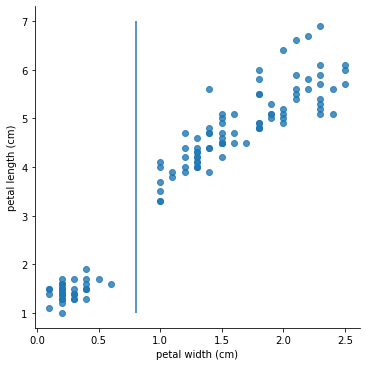

In [46]:
# Visualising below and above data
plotting_df = pd.DataFrame(data , columns = df.columns)
sns.lmplot(data=plotting_df, x = "petal width (cm)" , y ="petal length (cm)", fit_reg = False)
plt.vlines(x=split_val ,ymin=1,ymax=7 )

### Entropy 

In [53]:
# Entropy Calucation - Formula => -sum(pi * log(pi))
def calculate_entropy(data):
    target = data[:,-1]
    values , counts = np.unique(target , return_counts= True)
    prob = counts / (counts.sum())
    # Entropy Calculation
    entropy = sum(prob * -np.log2(prob))
    return entropy

In [56]:
calculate_entropy(data)

1.5836100169358511

In [62]:
# Calculation Overall Entropy after Spliting the data 
# Overall_entropy = sum(Di/D * entropy(Di))
def cal_overall_entropy(data_below , data_above):
    n_data_points = len(data_above) + len(data_below)
    p_above = len(data_above) / n_data_points
    p_below = len(data_below) / n_data_points
    # Calculating Overall Entropy
    overall_entropy = (p_above * calculate_entropy(data_above)) + (p_below * calculate_entropy(data_below))
    return overall_entropy

In [61]:
cal_overall_entropy(below ,above)

0.6461538461538462

In [64]:
# Calculation Split Info
# Split_info = sum(-Di * log(Di)) 
def cal_split_info(data_below , data_above):
    len_total = len(data_below) + len(data_above)
    p_below = len(data_below) / len_total
    p_above = len(data_above) / len_total
    # Calculating Split Info
    split_info = (-p_below)* np.log2(p_below) + (-p_above)* np.log2(p_above)
    return split_info

In [65]:
cal_split_info(below , above)

0.9374561707820048

In [69]:
# Finding the best split using GAIN RATIO
# GAIN RATIO = (Original_entropy - Curr_overall_entropy) / split_info 
def find_best_split_using_gain_ratio(data , split):
    info_gain = 0
    for col_index in split:
        for val in split[col_index]:
            # Spliting Data
            data_below , data_above = split_data(data , col_index , val)
            # Current_overall_entropy after Splitting
            curr_overall_entropy = cal_overall_entropy(data_below , data_above)
            # Root_entropy befor Splitting
            root_entopy = calculate_entropy(data)
            # Split_info on the Current Split
            split_info = cal_split_info(data_below , data_above)
            # Calculating the Gain Ratio
            curr_info_gain = (root_entopy - curr_overall_entropy)/split_info
            if info_gain <= curr_info_gain:
                info_gain = curr_info_gain
                best_split_col = col_index
                best_split_val = val
        
    return best_split_col , best_split_val , round(info_gain,7)

In [70]:
find_best_split_using_gain_ratio(data,potential_split(data))

(3, 0.8, 1.0)

# Decision Tree Steps Print

In [137]:
# Decision Tree Steps Print
# Level , Count , Current Entropy , Splitting on which Feature , Gain Ratio
def decision_tree_steps(df,counter=0 , min_samples = 1 , max_depth =5):
    
    # data preparation
    if counter == 0:
        global col_header
        col_header = df.columns
        data = df.values
    else:
        data = df
    
    # Base case 
    # if data if pure or remaining data is less than given sample or reached a certain Depth
    if (pure_node(data)) or (len(data) < min_samples) or (counter == max_depth):
        # If required till a certain Depth
        if((counter == max_depth) or (len(data) < min_samples)):
            return
        print('Level ',counter)
        iris_name,iris_count = (np.unique(data[:,-1], return_counts= True))        
        # Printing the Extracted Data
        for i in range(len(iris_name)):
            print('Count of ',iris_name[i], ' = ' , iris_count[i])
        print('Current Entropy is =' ,calculate_entropy(data))
        print('Reached leaf Node')
        print()
        
    # recursive part if Not Base case
    else:
        # Printing the Extracted Data
        print('Level ',counter)
        iris_name,iris_count = (np.unique(data[:,-1], return_counts= True))        
        for i in range(len(iris_name)):
            print('Count of ',iris_name[i], ' = ' , iris_count[i])
        print('Current Entropy is =' ,calculate_entropy(data))
        
        # Conter increment to know the Level or Max Depth
        counter +=1
        
        # Calculating the Potential Split and storing in Split
        split = potential_split(data)
        # Finding the best Split using Gain Ratio
        split_col , split_val , gain = find_best_split_using_gain_ratio(data , split)        
        # Spliting Data using split_col and split_val extarcted above 
        below , above = split_data(data,split_col , split_val)
        feature_name = col_header[split_col]
        print('Splitting on feature' ,feature_name,'<=',split_val,'with gain ratio',gain )
        print()
        
        # Recursive Call on the below and above Data
        decision_tree_steps(below,counter,min_samples,max_depth)
        decision_tree_steps(above,counter,min_samples,max_depth)
        

In [138]:
decision_tree_steps(df)

Level  0
Count of  setosa  =  50
Count of  versicolor  =  50
Count of  virginica  =  50
Current Entropy is = 1.584962500721156
Splitting on feature petal width (cm) <= 0.8 with gain ratio 1.0

Level  1
Count of  setosa  =  50
Current Entropy is = 0.0
Reached leaf Node

Level  1
Count of  versicolor  =  50
Count of  virginica  =  50
Current Entropy is = 1.0
Splitting on feature petal width (cm) <= 1.75 with gain ratio 0.6933648

Level  2
Count of  versicolor  =  49
Count of  virginica  =  5
Current Entropy is = 0.44506485705083865
Splitting on feature petal length (cm) <= 5.35 with gain ratio 0.6066178

Level  3
Count of  versicolor  =  49
Count of  virginica  =  3
Current Entropy is = 0.31821529768323314
Splitting on feature petal length (cm) <= 4.95 with gain ratio 0.2720453

Level  4
Count of  versicolor  =  47
Count of  virginica  =  1
Current Entropy is = 0.1460942501201363
Splitting on feature petal width (cm) <= 1.65 with gain ratio 1.0

Level  4
Count of  versicolor  =  2
Count 

# Decision Tree Implementation

In [110]:
# Decision Tree Implementation
def decision_tree_alogo(df,counter=0 , min_samples = 2 , max_depth =5):
    
    # data preparation
    if counter == 0:
        global col_header
        col_header = df.columns
        data = df.values
    else:
        data = df
    
    # base case
    if (pure_node(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        return classification
    
    # recursive part Almost same As Coded above in Tree Steps Printing
    else:
        counter +=1
        split = potential_split(data)
        split_col , split_val,gain_ratio = find_best_split_using_gain_ratio(data ,split)
        below , above = split_data(data,split_col , split_val)
        t , counts = np.unique(data[:,-1] , return_counts= True) 
        
        # subtree
        feature_name = col_header[split_col]
        quen = "{} <= {} , gain={} , samples={} ,value={} ".format( feature_name, split_val,
                                                                round(gain_ratio,7),len(data),counts)
        sub_tree = {quen :[]}
        
        #find answer
        yes_ans = decision_tree_alogo(below,counter,min_samples,max_depth)
        no_ans = decision_tree_alogo(above,counter,min_samples,max_depth)
        
        if yes_ans == no_ans:
            sub_tree = yes_ans
        else:
            sub_tree[quen].append(yes_ans)
            sub_tree[quen].append(no_ans)
        
        return sub_tree

In [130]:
tree =decision_tree_alogo(df,max_depth = 5)
pprint(tree)

{'petal width (cm) <= 0.8 , gain=1.0 , samples=150 ,value=[50 50 50] ': ['setosa',
                                                                         {'petal width (cm) <= 1.75 , gain=0.6933648 , samples=100 ,value=[50 50] ': [{'petal length (cm) <= 5.35 , gain=0.6066178 , samples=54 ,value=[49  5] ': [{'petal length (cm) <= 4.95 , gain=0.2720453 , samples=52 ,value=[49  3] ': [{'petal width (cm) <= 1.65 , gain=1.0 , samples=48 ,value=[47  1] ': ['versicolor',
                                                                                                                                                                                                                                                                                                                                                                                      'virginica']},
                                                                                                                                            

# Example : Confirmation Using OR

In [133]:
or_data = np.array([[0,0,0],[1,0,1],[0,1,1],[1,1,1]])
or_df = pd.DataFrame(or_data, columns = ['x1','x2','y'])
or_df

,x1,x2,y
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,1


In [139]:
decision_tree_steps(or_df)

Level  0
Count of  0  =  1
Count of  1  =  3
Current Entropy is = 0.8112781244591328
Splitting on feature x2 <= 0.5 with gain ratio 0.3112781

Level  1
Count of  0  =  1
Count of  1  =  1
Current Entropy is = 1.0
Splitting on feature x1 <= 0.5 with gain ratio 1.0

Level  2
Count of  0  =  1
Current Entropy is = 0.0
Reached leaf Node

Level  2
Count of  1  =  1
Current Entropy is = 0.0
Reached leaf Node

Level  1
Count of  1  =  2
Current Entropy is = 0.0
Reached leaf Node



In [135]:
or_tree =decision_tree_alogo(or_df)
pprint(or_tree)

{'x2 <= 0.5 , gain=0.3112781 , samples=4 ,value=[1 3] ': [{'x1 <= 0.5 , gain=1.0 , samples=2 ,value=[1 1] ': [0,
                                                                                                              1]},
                                                          1]}
